<a href="https://colab.research.google.com/github/kuba1990/TrainStation/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

....

In [ ]:
import os
import time
from google.colab import drive

import random
from random import shuffle
import shutil

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def make_accuracy_plot(history, fig_size = (10, 8)):
    """
    Funkcja zwraca wykres dokładności (accuracy) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize = fig_size)
    plt.plot(epochs, acc, label = 'Dokładność trenowania', marker = 'o')
    plt.plot(epochs, val_acc, label = 'Dokładność walidacji', marker = 'o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history, fig_size = (10, 8)):
    """
    Funkcja zwraca wykres straty (loss) modelu na zbiorze treningowym
    i walidacyjnym.
    """
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize = fig_size)
    plt.plot(epochs, loss, label = 'Strata trenowania', marker = 'o')
    plt.plot(epochs, val_loss, label = 'Strata walidacji', marker = 'o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()
    
def display_augmented_images(directory, index):
    """
    Funkcja zwraca wykres przykładowych obrazów uzyskanych za pomocą techniki
    augmentacji danych.
    """
    fnames = [os.path.join(directory, fname) for fname in os.listdir(directory)]
    img_path = fnames[index]
    img = image.load_img(img_path, target_size = (448, 448))

    x = image.img_to_array(img)
    x = x.reshape((1, ) + x.shape)

    i = 1
    plt.figure(figsize = (17, 13))
    for batch in datagen.flow(x, batch_size=1):
        plt.subplot(3, 4, i)
        plt.grid(False)
        imgplot = plt.imshow(image.array_to_img(batch[0]))
        i += 1
        if i % 13 == 0:
            break

Powyższe komórki to tylko import oraz rysowanie wykresów.

In [ ]:
%%bash
rm -rf /content/*

In [ ]:
base_directory = '/content/teeth_images'

if not os.path.exists(base_directory):
    os.mkdir(base_directory)

train_directory = os.path.join(base_directory, 'train')
valid_directory = os.path.join(base_directory, 'valid')
test_directory = os.path.join(base_directory, 'test')


for directory in (train_directory, valid_directory, test_directory):
    if not os.path.exists(directory):
        os.mkdir(directory)

train_positive_directory = os.path.join(train_directory, 'positive')
train_negative_directory = os.path.join(train_directory, 'negative')

valid_positive_directory = os.path.join(valid_directory, 'positive')
valid_negative_directory = os.path.join(valid_directory, 'negative')

test_positive_directory = os.path.join(test_directory, 'positive')
test_negative_directory = os.path.join(test_directory, 'negative')

all_directory = [train_positive_directory, train_negative_directory, \
                 valid_positive_directory, valid_negative_directory, \
                 test_positive_directory, test_negative_directory]

for directory in all_directory:
    if not os.path.exists(directory):
        os.mkdir(directory)

In [ ]:
drive.mount("/drive")

Mounted at /drive


In [ ]:
%%bash
unzip -q '/drive/My Drive/zdjecia.zip' -d /content/original_data

In [ ]:
zdjecia = ['/content/original_data/zdjйcia/chore', \
           '/content/original_data/zdjйcia/zdrowe']
new_name = ['positive', 'negative']
total_images = 0
total_image_names = []

for i, c_name in enumerate(zdjecia):
    file_list = os.listdir(c_name)
    total_images += len(file_list)
    total_image_names.append(file_list)
    for count, file_name in enumerate(file_list):
        if new_name[i] in file_name.split('.'):
            break
        new = new_name[i] + '.' + str(count) + '.jpg'
        old = c_name + '/' + file_name 
        new = c_name + '/' + new
        os.rename(old, new)

Powyższe komórki rozpakowują zdjęcia z gdrive i pakują do colab.

In [ ]:
#72 zdjęcia zdrowe
a = 50
b = 72
c = 72 #bez zbioru test

file_names = ['negative.{}.jpg'.format(i) for i in range(a)]
for file_name in file_names:
    source = os.path.join(zdjecia[1], file_name)
    destination = os.path.join(train_negative_directory, file_name)
    shutil.copyfile(source, destination)

file_names = ['negative.{}.jpg'.format(i) for i in range(a, b)]
for file_name in file_names:
    source = os.path.join(zdjecia[1], file_name)
    destination = os.path.join(valid_negative_directory, file_name)
    shutil.copyfile(source, destination)

file_names = ['negative.{}.jpg'.format(i) for i in range(b, c)]
for file_name in file_names:
    source = os.path.join(zdjecia[1], file_name)
    destination = os.path.join(test_negative_directory, file_name)
    shutil.copyfile(source, destination)



#48 zdjęcia chore
a = 30
b = 48
c = 48 #bez zbioru test

file_names = ['positive.{}.jpg'.format(i) for i in range(a)]
for file_name in file_names:
    source = os.path.join(zdjecia[0], file_name)
    destination = os.path.join(train_positive_directory, file_name)
    shutil.copyfile(source, destination)

file_names = ['positive.{}.jpg'.format(i) for i in range(a, b)]
for file_name in file_names:
    source = os.path.join(zdjecia[0], file_name)
    destination = os.path.join(valid_positive_directory, file_name)
    shutil.copyfile(source, destination)

file_names = ['positive.{}.jpg'.format(i) for i in range(b, c)]
for file_name in file_names:
    source = os.path.join(zdjecia[0], file_name)
    destination = os.path.join(test_positive_directory, file_name)
    shutil.copyfile(source, destination)

In [ ]:
print('Zdjęcia "chore" w zbiorze: train', len(os.listdir(train_positive_directory)))
print('Zdjęcia "chore" w zbiorze: valid', len(os.listdir(valid_positive_directory)))
print('Zdjęcia "chore" w zbiorze: test', len(os.listdir(test_positive_directory)))
print()
print('Zdjęcia "zdrowe" w zbiorze: train', len(os.listdir(train_negative_directory)))
print('Zdjęcia "zdrowe" w zbiorze: valid', len(os.listdir(valid_negative_directory)))
print('Zdjęcia "zdrowe" w zbiorze: test', len(os.listdir(test_negative_directory)))

Zdjęcia "chore" w zbiorze: train 30
Zdjęcia "chore" w zbiorze: valid 18
Zdjęcia "chore" w zbiorze: test 0

Zdjęcia "zdrowe" w zbiorze: train 50
Zdjęcia "zdrowe" w zbiorze: valid 22
Zdjęcia "zdrowe" w zbiorze: test 0


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255.)
valid_datagen = ImageDataGenerator(rescale = 1./255.)

in_shape = (448, 448)

train_generator = train_datagen.flow_from_directory(directory = train_directory,
                                                   target_size = in_shape,
                                                   batch_size = 2,
                                                   class_mode = 'binary')

valid_generator = valid_datagen.flow_from_directory(directory = valid_directory,
                                                   target_size = in_shape,
                                                   batch_size = 1,
                                                   class_mode = 'binary')

Found 80 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3),
                        activation = 'relu', input_shape = (448, 448, 3)))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

model.add(layers.Conv2D(filters = 64, kernel_size = (3, 3),
                        activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3),
                        activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

model.add(layers.Conv2D(filters = 128, kernel_size = (3, 3),
                        activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(units = 512, activation = 'relu'))
model.add(layers.Dense(units = 1, activation = 'sigmoid'))

model.summary()

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 446, 446, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 223, 223, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 221, 221, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       1

In [ ]:
start = time.time()
history = model.fit_generator(generator=train_generator,
                             steps_per_epoch = 10,
                             epochs = 20,
                             validation_data=valid_generator,
                             validation_steps = 16)

stop = time.time()
print('Czas przetwarzania: {}'.format(stop - start))
model.save('dent_aug.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
10/10 [==============================] - 20s 2s/step - loss: 0.2008 - accuracy: 0.9000 - val_loss: 0.2892 - val_accuracy: 0.8750
Epoch 2/20
10/10 [==============================] - 20s 2s/step - loss: 0.0685 - accuracy: 0.9500 - val_loss: 0.7633 - val_accuracy: 0.8125
Epoch 3/20
10/10 [==============================] - 20s 2s/step - loss: 1.3087 - accuracy: 0.7500 - val_loss: 0.1741 - val_accuracy: 1.0000
Epoch 4/20
10/10 [==============================] - 20s 2s/step - loss: 0.2349 - accuracy: 0.9000 - val_loss: 0.7111 - val_accuracy: 0.8125
Epoch 5/20
10/10 [==============================] - 20s 2s/step - loss: 0.7017 - accuracy: 0.9000 - val_loss: 0.3782 - val_accuracy: 0.6875
Epoch 6/20
10/10 [==============================] - 20s 2s/step - loss: 0.2655 - accuracy: 0.8500 - val_loss: 0.1370 - val_accuracy: 1.0000
Epoch 7/20
10/10 [==============================] - 20s 2s/step - loss: 0.0888 - accuracy: 0.9500 - val_loss: 0.1542 - val_accuracy: 0.9375
Epoch 8/20
10/10 [==

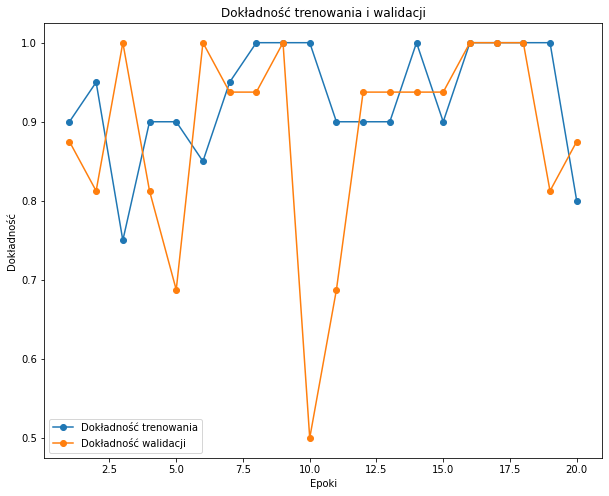

In [ ]:
make_accuracy_plot(history)